### Import required libraries

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import glob
%matplotlib inline

### Import the data set

In [2]:
retailer_data = pd.DataFrame(pd.read_csv('Retailer.csv'))
product_data = pd.DataFrame(pd.read_csv('Product.csv'))
sales_data1 = pd.DataFrame(pd.read_csv('File 01 - Sales Data.csv'))
sales_data2 = pd.DataFrame(pd.read_csv('File 02 - Sales Data.csv'))

### Merge sales_data1 & sales_data2

In [3]:
df = [ sales_data1, sales_data2]
data = pd.DataFrame(pd.concat(df)).sort_values(by=['Date'], ascending=False)

# Pre Analysis
### Sales Data

In [4]:
data.head(10)

,Retailer Code,Rep,Product Code,Date,Net Sales Qty,Net Sales Value,Sales Return Qty,Sales Return Value
513320,WADU0118,WADDUWA - R1,501480,"Wednesday, September 26 2012",3,201.78,0,0.0
116823,DEMA0349,DEMATAGODA - R1,501467,"Wednesday, September 26 2012",2,340.62,0,0.0
116945,DEMA0349,DEMATAGODA - R1,501765,"Wednesday, September 26 2012",3,594.06,0,0.0
360346,KADU0308,KADUWELA - R1,501480,"Wednesday, September 26 2012",6,403.56,0,0.0
142539,HANW0168,HANWELLA - R1,500137,"Wednesday, September 26 2012",1,108.01,0,0.0
116895,DEMA0349,DEMATAGODA - R1,501487,"Wednesday, September 26 2012",12,533.28,0,0.0
116885,DEMA0349,DEMATAGODA - R1,501484,"Wednesday, September 26 2012",3,212.55,0,0.0
116882,DEMA0349,DEMATAGODA - R1,501483,"Wednesday, September 26 2012",6,634.98,0,0.0
360265,KADU0308,KADUWELA - R1,500131,"Wednesday, September 26 2012",3,262.02,0,0.0
360264,KADU0308,KADUWELA - R1,500129,"Wednesday, September 26 2012",3,262.02,0,0.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1137470 entries, 513320 to 119053
Data columns (total 8 columns):
Retailer Code         1137470 non-null object
Rep                   1137470 non-null object
Product Code          1137470 non-null int64
Date                  1137470 non-null object
Net Sales Qty         1137470 non-null int64
Net Sales Value       1137470 non-null float64
Sales Return Qty      1137470 non-null int64
Sales Return Value    1137470 non-null float64
dtypes: float64(2), int64(3), object(3)
memory usage: 78.1+ MB


### Retailer Data

In [6]:
retailer_data.head(10)

,Retailer Code,Sub Ret Cat Name,Zone Name,Region Name,Territory Name
0,ATHU0001,NORMAL,ZONE 02,COLOMBO 02 MAIN,ATHURUGIRIYA
1,ATHU0003,NORMAL,ZONE 02,COLOMBO 02 MAIN,ATHURUGIRIYA
2,ATHU0005,NORMAL,ZONE 02,COLOMBO 02 MAIN,ATHURUGIRIYA
3,ATHU0006,NORMAL,ZONE 02,COLOMBO 02 MAIN,ATHURUGIRIYA
4,ATHU0007,NORMAL,ZONE 02,COLOMBO 02 MAIN,ATHURUGIRIYA
5,ATHU0008,NORMAL,ZONE 02,COLOMBO 02 MAIN,ATHURUGIRIYA
6,ATHU0009,NORMAL,ZONE 02,COLOMBO 02 MAIN,ATHURUGIRIYA
7,ATHU0010,NORMAL,ZONE 02,COLOMBO 02 MAIN,ATHURUGIRIYA
8,ATHU0011,NORMAL,ZONE 02,COLOMBO 02 MAIN,ATHURUGIRIYA
9,ATHU0012,NORMAL,ZONE 02,COLOMBO 02 MAIN,ATHURUGIRIYA


In [7]:
retailer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6118 entries, 0 to 6117
Data columns (total 5 columns):
Retailer Code       6110 non-null object
Sub Ret Cat Name    5872 non-null object
Zone Name           6110 non-null object
Region Name         6110 non-null object
Territory Name      6118 non-null object
dtypes: object(5)
memory usage: 239.1+ KB


### We can identify there are columns without data in retailer data set

In [8]:
retailer_data['Retailer Code'].nunique()

6110

In [9]:
data['Retailer Code'].nunique()

7139

### Product Data

In [10]:
product_data.head(10)

,Product Code,Product Description,Product Group Name,Brand Name,Sub Product Description
0,500003,BIEN AIME COLOGNE 50ML,Cologne,Bien Aime,REGULAR COLOGNE
1,500004,BIEN AIME COLOGNE 100ML,Cologne,Bien Aime,REGULAR COLOGNE
2,500031,BABY CHERAMY SHAMPOO 125ML old,SHAMPOO,Baby Cheramy,REGULAR SHAMPOO
3,500034,BIEN AIME COLOGNE 200ML,Cologne,Bien Aime,REGULAR COLOGNE
4,500047,BABY CHERAMY PRICKLY HEAT 100G,Talc & Powder,Baby Cheramy,PRICKLY HEAT TALC
5,500053,CLOGARD MOUTHWASH 200ML,MOUTH WASH,Clogard Toothpaste,MOUTH WASH
6,500069,CAPRI PERFUMED COLOGNE (REG) 30ML,Cologne,Capri,REGULAR COLOGNE
7,500070,CAPRI PERFUMED COLOGNE (REG) 50ML,Cologne,Capri,REGULAR COLOGNE
8,500071,CAPRI PERFUMED COLOGNE (SPR) 50ML,Cologne,Capri,REGULAR COLOGNE
9,500084,DANDEX HAIR CREAM 100ML,Hair Cream,Dandex,HAIR CREAM


In [11]:
product_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 5 columns):
Product Code               457 non-null int64
Product Description        457 non-null object
Product Group Name         457 non-null object
Brand Name                 457 non-null object
Sub Product Description    457 non-null object
dtypes: int64(1), object(4)
memory usage: 17.9+ KB


# Identify the behavior of the product over the years

In [12]:
year_prod =  data.groupby('Product Code')['Date'].count().sort_values().reset_index()

In [13]:
year_prod.head(10)

,Product Code,Date
0,605048,1
1,501143,1
2,605047,1
3,502074,1
4,501578,1
5,502043,1
6,500781,2
7,501803,2
8,604083,2
9,501645,2


In [14]:
year_prod.tail(10)

,Product Code,Date
447,603756,20302
448,502429,22965
449,501465,25044
450,502427,27618
451,501764,33876
452,501461,34554
453,604927,36823
454,501453,39662
455,500137,51894
456,501459,59520


# Data Preparation

### Clean the data set

In [15]:
clean_retailer_data = retailer_data.dropna()

In [16]:
clean_retailer_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5872 entries, 0 to 6117
Data columns (total 5 columns):
Retailer Code       5872 non-null object
Sub Ret Cat Name    5872 non-null object
Zone Name           5872 non-null object
Region Name         5872 non-null object
Territory Name      5872 non-null object
dtypes: object(5)
memory usage: 275.2+ KB


In [17]:
retailers = clean_retailer_data['Retailer Code'].unique()

In [18]:
cleaned_data = data[data['Retailer Code'].isin(retailers)]

In [19]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 965231 entries, 116823 to 119053
Data columns (total 8 columns):
Retailer Code         965231 non-null object
Rep                   965231 non-null object
Product Code          965231 non-null int64
Date                  965231 non-null object
Net Sales Qty         965231 non-null int64
Net Sales Value       965231 non-null float64
Sales Return Qty      965231 non-null int64
Sales Return Value    965231 non-null float64
dtypes: float64(2), int64(3), object(3)
memory usage: 66.3+ MB


In [20]:
dropped = data[~data['Retailer Code'].isin(retailers)]

In [21]:
dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172239 entries, 513320 to 517339
Data columns (total 8 columns):
Retailer Code         172239 non-null object
Rep                   172239 non-null object
Product Code          172239 non-null int64
Date                  172239 non-null object
Net Sales Qty         172239 non-null int64
Net Sales Value       172239 non-null float64
Sales Return Qty      172239 non-null int64
Sales Return Value    172239 non-null float64
dtypes: float64(2), int64(3), object(3)
memory usage: 11.8+ MB


#### We have dropped 172239 records

In [22]:
cleaned_data.head(10)

,Retailer Code,Rep,Product Code,Date,Net Sales Qty,Net Sales Value,Sales Return Qty,Sales Return Value
116823,DEMA0349,DEMATAGODA - R1,501467,"Wednesday, September 26 2012",2,340.62,0,0.0
116945,DEMA0349,DEMATAGODA - R1,501765,"Wednesday, September 26 2012",3,594.06,0,0.0
360346,KADU0308,KADUWELA - R1,501480,"Wednesday, September 26 2012",6,403.56,0,0.0
142539,HANW0168,HANWELLA - R1,500137,"Wednesday, September 26 2012",1,108.01,0,0.0
116895,DEMA0349,DEMATAGODA - R1,501487,"Wednesday, September 26 2012",12,533.28,0,0.0
116885,DEMA0349,DEMATAGODA - R1,501484,"Wednesday, September 26 2012",3,212.55,0,0.0
116882,DEMA0349,DEMATAGODA - R1,501483,"Wednesday, September 26 2012",6,634.98,0,0.0
360265,KADU0308,KADUWELA - R1,500131,"Wednesday, September 26 2012",3,262.02,0,0.0
360264,KADU0308,KADUWELA - R1,500129,"Wednesday, September 26 2012",3,262.02,0,0.0
116865,DEMA0349,DEMATAGODA - R1,501480,"Wednesday, September 26 2012",6,403.56,0,0.0


### Convert Date to date time

In [23]:
cleaned_data['Date'] = pd.to_datetime(cleaned_data['Date'])

C:\Users\Kumara Fernando\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [24]:
cleaned_data.head(10)

,Retailer Code,Rep,Product Code,Date,Net Sales Qty,Net Sales Value,Sales Return Qty,Sales Return Value
116823,DEMA0349,DEMATAGODA - R1,501467,2012-09-26,2,340.62,0,0.0
116945,DEMA0349,DEMATAGODA - R1,501765,2012-09-26,3,594.06,0,0.0
360346,KADU0308,KADUWELA - R1,501480,2012-09-26,6,403.56,0,0.0
142539,HANW0168,HANWELLA - R1,500137,2012-09-26,1,108.01,0,0.0
116895,DEMA0349,DEMATAGODA - R1,501487,2012-09-26,12,533.28,0,0.0
116885,DEMA0349,DEMATAGODA - R1,501484,2012-09-26,3,212.55,0,0.0
116882,DEMA0349,DEMATAGODA - R1,501483,2012-09-26,6,634.98,0,0.0
360265,KADU0308,KADUWELA - R1,500131,2012-09-26,3,262.02,0,0.0
360264,KADU0308,KADUWELA - R1,500129,2012-09-26,3,262.02,0,0.0
116865,DEMA0349,DEMATAGODA - R1,501480,2012-09-26,6,403.56,0,0.0


### Get a sample product to build the model

In [25]:
test_product = cleaned_data[cleaned_data['Product Code'].isin(['501459'])].reindex()

In [26]:
test_product.head(10)

,Retailer Code,Rep,Product Code,Date,Net Sales Qty,Net Sales Value,Sales Return Qty,Sales Return Value
116768,DEMA0349,DEMATAGODA - R1,501459,2012-09-26,150,5293.50,0,0.0
359880,KADU0303,KADUWELA - R1,501459,2012-09-26,0,0.00,0,0.0
361277,KADU0322,KADUWELA - R1,501459,2012-09-26,15,529.35,0,0.0
117396,DEMA0352,DEMATAGODA - R1,501459,2012-09-26,150,5293.50,0,0.0
230598,KESB0302,KESBEWA - R1,501459,2012-09-26,1500,52935.00,0,0.0
115772,DEMA0335,DEMATAGODA - R1,501459,2012-09-26,36,1270.44,0,0.0
116625,DEMA0344,DEMATAGODA - R1,501459,2012-09-26,12,423.48,0,0.0
359065,KADU0291,KADUWELA - R1,501459,2012-09-26,0,0.00,0,0.0
358825,KADU0289,KADUWELA - R1,501459,2012-09-26,12,423.48,0,0.0
229867,KESB0296,KESBEWA - R1,501459,2012-09-26,1500,52935.00,0,0.0


In [27]:
sample_set = test_product.filter(['Date', 'Net Sales Qty'], axis=1).set_index('Date')
sample_set = sample_set.groupby('Date')['Net Sales Qty'].sum().reindex()

In [28]:
sample_set.head(10)

Date
2012-04-02    4645
2012-04-03    8920
2012-04-04    4664
2012-04-05    3905
2012-04-06    1032
2012-04-07    5870
2012-04-08    3289
2012-04-09    3761
2012-04-10     123
2012-04-18     826
Name: Net Sales Qty, dtype: int64

In [29]:
data_set = pd.DataFrame(sample_set)

In [30]:
data_set.index = pd.to_datetime(data_set.index)

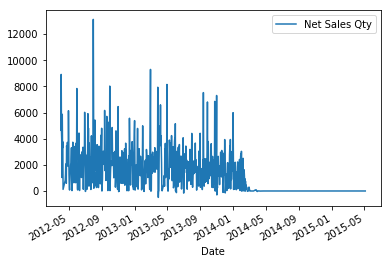

In [31]:
data_set.plot()

#### Remove 0 values

In [32]:
data_set = data_set[~data_set['Net Sales Qty'].isin(['0'])].reindex()

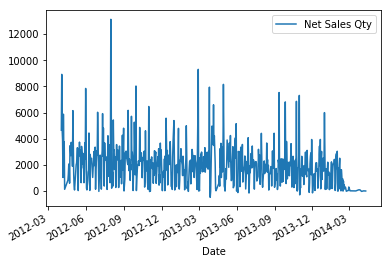

In [33]:
data_set.plot()

In [34]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 656 entries, 2012-04-02 to 2014-04-10
Data columns (total 1 columns):
Net Sales Qty    656 non-null int64
dtypes: int64(1)
memory usage: 10.2 KB


# Model

### Devide train data & test data

In [35]:
train_set = data_set.head(int(len(data_set)*0.70))
test_set = data_set.tail(int(len(data_set)*0.30))

In [36]:
train_set.head(10)

,Net Sales Qty
Date,
2012-04-02,4645
2012-04-03,8920
2012-04-04,4664
2012-04-05,3905
2012-04-06,1032
2012-04-07,5870
2012-04-08,3289
2012-04-09,3761
2012-04-10,123


In [37]:
test_set.head(10)

,Net Sales Qty
Date,
2013-08-13,3667
2013-08-14,1889
2013-08-15,2396
2013-08-16,1423
2013-08-17,1960
2013-08-18,66
2013-08-19,1211
2013-08-21,1336
2013-08-22,1624


### Scale Data

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
scaler = MinMaxScaler()

In [40]:
train_scaled = scaler.fit_transform(train_set)

In [41]:
test_scaled = scaler.transform(test_set)

In [42]:
def next_batch(training_data, batch_size, steps):
    rand_start = np.random.randint(0, len(training_data)-steps)
    y_batch = np.array(training_data[rand_start: rand_start+steps+1]).reshape(1,steps+1)
    return y_batch[:,:-1].reshape(-1,steps,1), y_batch[:,1:].reshape(-1,steps,1)

### Set up a RNN Model

In [43]:
import tensorflow as tf

In [44]:
num_inputs = 1

num_time_steps = 12

num_neurons = 100

num_outputs = 1

learning_rate = 0.001

num_train_iterations = 6000

batch_size = 1

In [45]:
x = tf.placeholder(tf.float32,[None, num_time_steps, num_inputs])
y = tf.placeholder(tf.float32,[None, num_time_steps, num_outputs])

In [46]:
cell = tf.contrib.rnn.OutputProjectionWrapper(tf.contrib.rnn.BasicLSTMCell(num_units = num_neurons, activation = tf.nn.relu),  output_size = num_outputs)

In [47]:
outputs, states = tf.nn.dynamic_rnn(cell, x, dtype = tf.float32)

### Loss Function and Optimizer

In [48]:
loss = tf.reduce_mean(tf.square(outputs-y))

In [49]:
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
train = optimizer.minimize(loss)

### Initialize global variables

In [50]:
init = tf.global_variables_initializer()

### Save the trained Model

In [51]:
saver = tf.train.Saver()

## Session

In [52]:
with tf.Session() as sess:
    sess.run(init)
    for iteration in range(num_train_iterations):
        x_batch, y_batch = next_batch(train_scaled, batch_size, num_time_steps)
        sess.run(train, feed_dict = { x: x_batch, y: y_batch})
        if iteration %100 == 0:
            mse = loss.eval(feed_dict = { x: x_batch, y: y_batch})
            print(iteration, '\tMSE: ', mse)
            
    saver.save(sess, './ex_time_series_model')

0 	MSE:  0.04059756
100 	MSE:  0.0057591894
200 	MSE:  0.013142283
300 	MSE:  0.009458791
400 	MSE:  0.06549739
500 	MSE:  0.009219206
600 	MSE:  0.030331546
700 	MSE:  0.0023812307
800 	MSE:  0.017328208
900 	MSE:  0.012925821
1000 	MSE:  0.012409891
1100 	MSE:  0.008222717
1200 	MSE:  0.013867891
1300 	MSE:  0.015260667
1400 	MSE:  0.005008938
1500 	MSE:  0.0046500335
1600 	MSE:  0.0077999323
1700 	MSE:  0.015518665
1800 	MSE:  0.017857278
1900 	MSE:  0.0028002064
2000 	MSE:  0.008415149
2100 	MSE:  0.007924104
2200 	MSE:  0.0069071744
2300 	MSE:  0.007512378
2400 	MSE:  0.002624431
2500 	MSE:  0.014425333
2600 	MSE:  0.019145036
2700 	MSE:  0.0139844455
2800 	MSE:  0.009815537
2900 	MSE:  0.009029284
3000 	MSE:  0.019132476
3100 	MSE:  0.007844525
3200 	MSE:  0.06127444
3300 	MSE:  0.00382933
3400 	MSE:  0.008696
3500 	MSE:  0.0036532187
3600 	MSE:  0.008239148
3700 	MSE:  0.0065450086
3800 	MSE:  0.005272407
3900 	MSE:  0.0036191028
4000 	MSE:  0.004601151
4100 	MSE:  0.010830287
4

### Predict the future values

In [53]:
test_set.head(10)

,Net Sales Qty
Date,
2013-08-13,3667
2013-08-14,1889
2013-08-15,2396
2013-08-16,1423
2013-08-17,1960
2013-08-18,66
2013-08-19,1211
2013-08-21,1336
2013-08-22,1624


In [54]:
with tf.Session() as sess:
    saver.restore(sess, './ex_time_series_model')
    train_seed = list(train_scaled)
    n = int(len(test_scaled))
            
    for iteration in range(n):
        x_batch = np.array(train_seed[-num_time_steps:]).reshape(1, num_time_steps, 1)
        y_pred = sess.run(outputs, feed_dict = {x: x_batch})
        
        train_seed.append(y_pred[0, -1, 0])

INFO:tensorflow:Restoring parameters from ./ex_time_series_model


In [55]:
train_seed

[array([0.37710092]),
 array([0.69086239]),
 array([0.37849541]),
 array([0.32278899]),
 array([0.11192661]),
 array([0.46700917]),
 array([0.27757798]),
 array([0.31222018]),
 array([0.04521101]),
 array([0.09680734]),
 array([0.12910092]),
 array([0.18436697]),
 array([0.18847706]),
 array([0.07963303]),
 array([0.29020183]),
 array([0.27985321]),
 array([0.23449541]),
 array([0.30921101]),
 array([0.27493578]),
 array([0.25511927]),
 array([0.17438532]),
 array([0.48719266]),
 array([0.12858716]),
 array([0.06165138]),
 array([0.04146789]),
 array([0.14678899]),
 array([0.1826789]),
 array([0.19273394]),
 array([0.2333211]),
 array([0.27897248]),
 array([0.19170642]),
 array([0.03816514]),
 array([0.27354128]),
 array([0.23244037]),
 array([0.31016514]),
 array([0.23750459]),
 array([0.26458716]),
 array([0.20322936]),
 array([0.08242202]),
 array([0.28638532]),
 array([0.25423853]),
 array([0.18869725]),
 array([0.24807339]),
 array([0.16594495]),
 array([0.16176147]),
 array([0.08

In [56]:
results = scaler.inverse_transform(np.array(test_scaled).reshape(n,1))

In [57]:
test_set['Generated'] = results

C:\Users\Kumara Fernando\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [58]:
test_set.head(10)

,Net Sales Qty,Generated
Date,,
2013-08-13,3667,3667.0
2013-08-14,1889,1889.0
2013-08-15,2396,2396.0
2013-08-16,1423,1423.0
2013-08-17,1960,1960.0
2013-08-18,66,66.0
2013-08-19,1211,1211.0
2013-08-21,1336,1336.0
2013-08-22,1624,1624.0


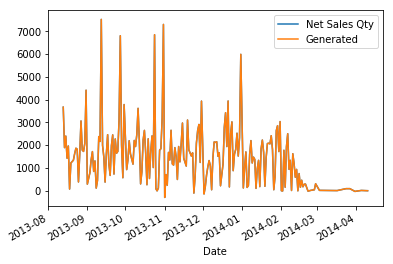

In [59]:
test_set.plot()

In [60]:
y_test = np.array(test_set['Net Sales Qty'])

In [62]:
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score

In [64]:
r2_score(y_test, results)

1.0

In [65]:
classification_report(y_test, results, labels = None)

ValueError: Mix type of y not allowed, got types {'continuous', 'multiclass'}